In [250]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors as de
from rdkit.Chem import AllChem

In [370]:
m = Chem.MolFromSmiles('c1ccccc1[N+](=O)[O-]')

a = Chem.MolFromSmiles('C1=CC=CC=C1 ')

c = Chem.MolFromSmiles('O=C1NC(=O)NC=C1C')
taxol = Chem.MolFromSmiles('CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](c5ccccc5)NC(=O)c6ccccc6)O)O)OC(=O)c7ccccc7)(CO4)OC(=O)C)O)C)OC(=O)C')
b = a, m, c, taxol
b

anisol = Chem.MolFromMolFile('Anisol.mol')
anisol_nondef = Chem.MolFromMolFile('Anisol_2.mol')

Structure1
     RDKit          2D

  8  8  0  0  1  0  0  0  0  0999 V2000
   -2.3221   -0.3572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8762    1.0750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4129    1.4050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6045    0.3028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1586   -1.1294    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3047   -1.4594    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0677    0.6327    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0851   -0.4695    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  6  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  4  7  1  0
  5  6  2  0
  7  8  1  0
M  END



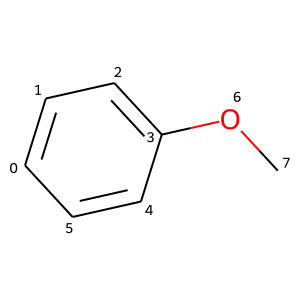

In [367]:
AllChem.Compute2DCoords(anisol)
print(Chem.MolToMolBlock(anisol))
anisol

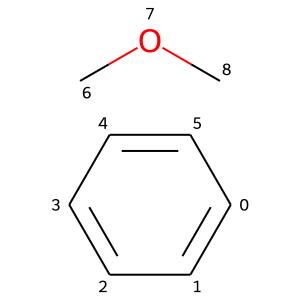

In [372]:
AllChem.Compute2DCoords(anisol_nondef)
anisol_nondef

In [374]:
from rdkit.Chem.Draw import rdDepictor

from rdkit.Chem import rdMolEnumerator

In [378]:
anisol_nondef_bundle = rdMolEnumerator.Enumerate(anisol_nondef)

Draw.MolsToGridImage(anisol_nondef_bundle)

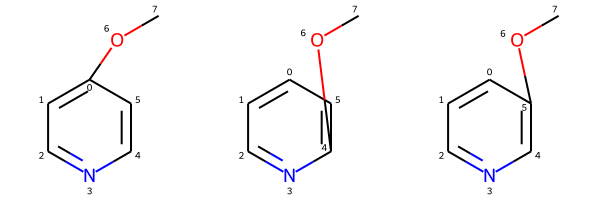

In [380]:
pv1 = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
pv1

pv1_bundle = rdMolEnumerator.Enumerate(pv1)

Draw.MolsToGridImage(pv1_bundle)

In [69]:
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [71]:
# m = Chem.MolFromSmiles('OCc1ccccc1CN')
#feats = factory.GetFeaturesForMol(m)
#len(feats)

ArgumentError: Python argument types in
    MolChemicalFeatureFactory.GetNumMolFeatures(MolChemicalFeatureFactory, list)
did not match C++ signature:
    GetNumMolFeatures(RDKit::MolChemicalFeatureFactory, RDKit::ROMol mol, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > includeOnly='')

In [76]:
#for features in passed_molecules:
 #   Mol_features = factory.GetFeaturesForMol(features)
  #  print(len(Mol_features))

3


In [157]:
from rdkit.Chem import Lipinski as lip
from rdkit.Chem import Crippen as cr
from rdkit.Chem import rdmolfiles as rdfiles


 ### Here, the two modules used to calculate chemical features are shown

    lip.NumHAcceptors(taxol)
    cr.MolLogP()

In [347]:
passed_molecules = []
testlist = []

for i in b: 
    '''Set the target molecular weight of the dataset'''
    if de.ExactMolWt(i) < 1500: #Set the Mw cut off value
        #passed_molecules.append(i)
        if 0 < lip.NumHAcceptors(i) <= 18: #Set the value of hydrogen bond acceptors cut off values
            if 0 <= lip.NumHDonors(i) <= 50: #Set the value of hydrogen bond acceptor cut off values
                if 0<= cr.MolLogP(i) <= 5:
                    passed_molecules.append(i)


#for features in passed_molecules:
    

logP_list = []
for logP in passed_molecules:
    logp = cr.MolLogP(logP)
    logP_list.append(logp)
    
print(logP_list)
print(molecular_weight)

molecular_weight = []
for mol in passed_molecules:
    weight = de.ExactMolWt(mol)
    molecular_weight.append(weight)

[1.5947999999999998, 3.735700000000004]
[123.0320284, 853.3309553120001]


In [353]:
mol_weight = []
logP = []

for i in molecular_weight:
    j = str(i)
    mol_weight.append(j)

for i in logP_list:
    j = str(i)
    logP.append(j)

print(type(logP))

<class 'list'>


In [ ]:
kxjdfx

In [354]:
res = list(sub1 + sub2 for sub1, sub2 in zip(test_list1, test_list2))
  
# printing result
print("The concatenated Matrix : " + str(res))

NameError: name 'test_list1' is not defined

(123.0320284, 853.3309553120001)
<class 'str'>


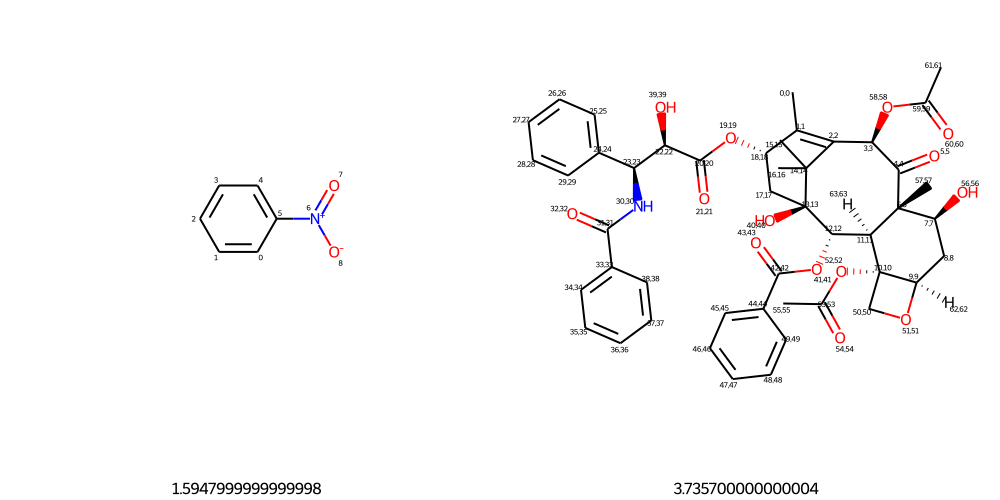

In [363]:
print(legens_properties)

LEGENDS = ('198.233', 'cde', 'efg')
print(type(legens_properties))

img = Draw.MolsToGridImage(passed_molecules,molsPerRow=2,subImgSize=(500,500), legends = logP)
img

In [136]:
lip.NumHDonors(taxol)

4

# Import large number of molecules
    
Using 
    
    rdfolfiles.SmilesMolSupplier() 
    
it is possible to import a large number of molecules in a .smi file from eg ChemDraw or Maestro for further evaluation

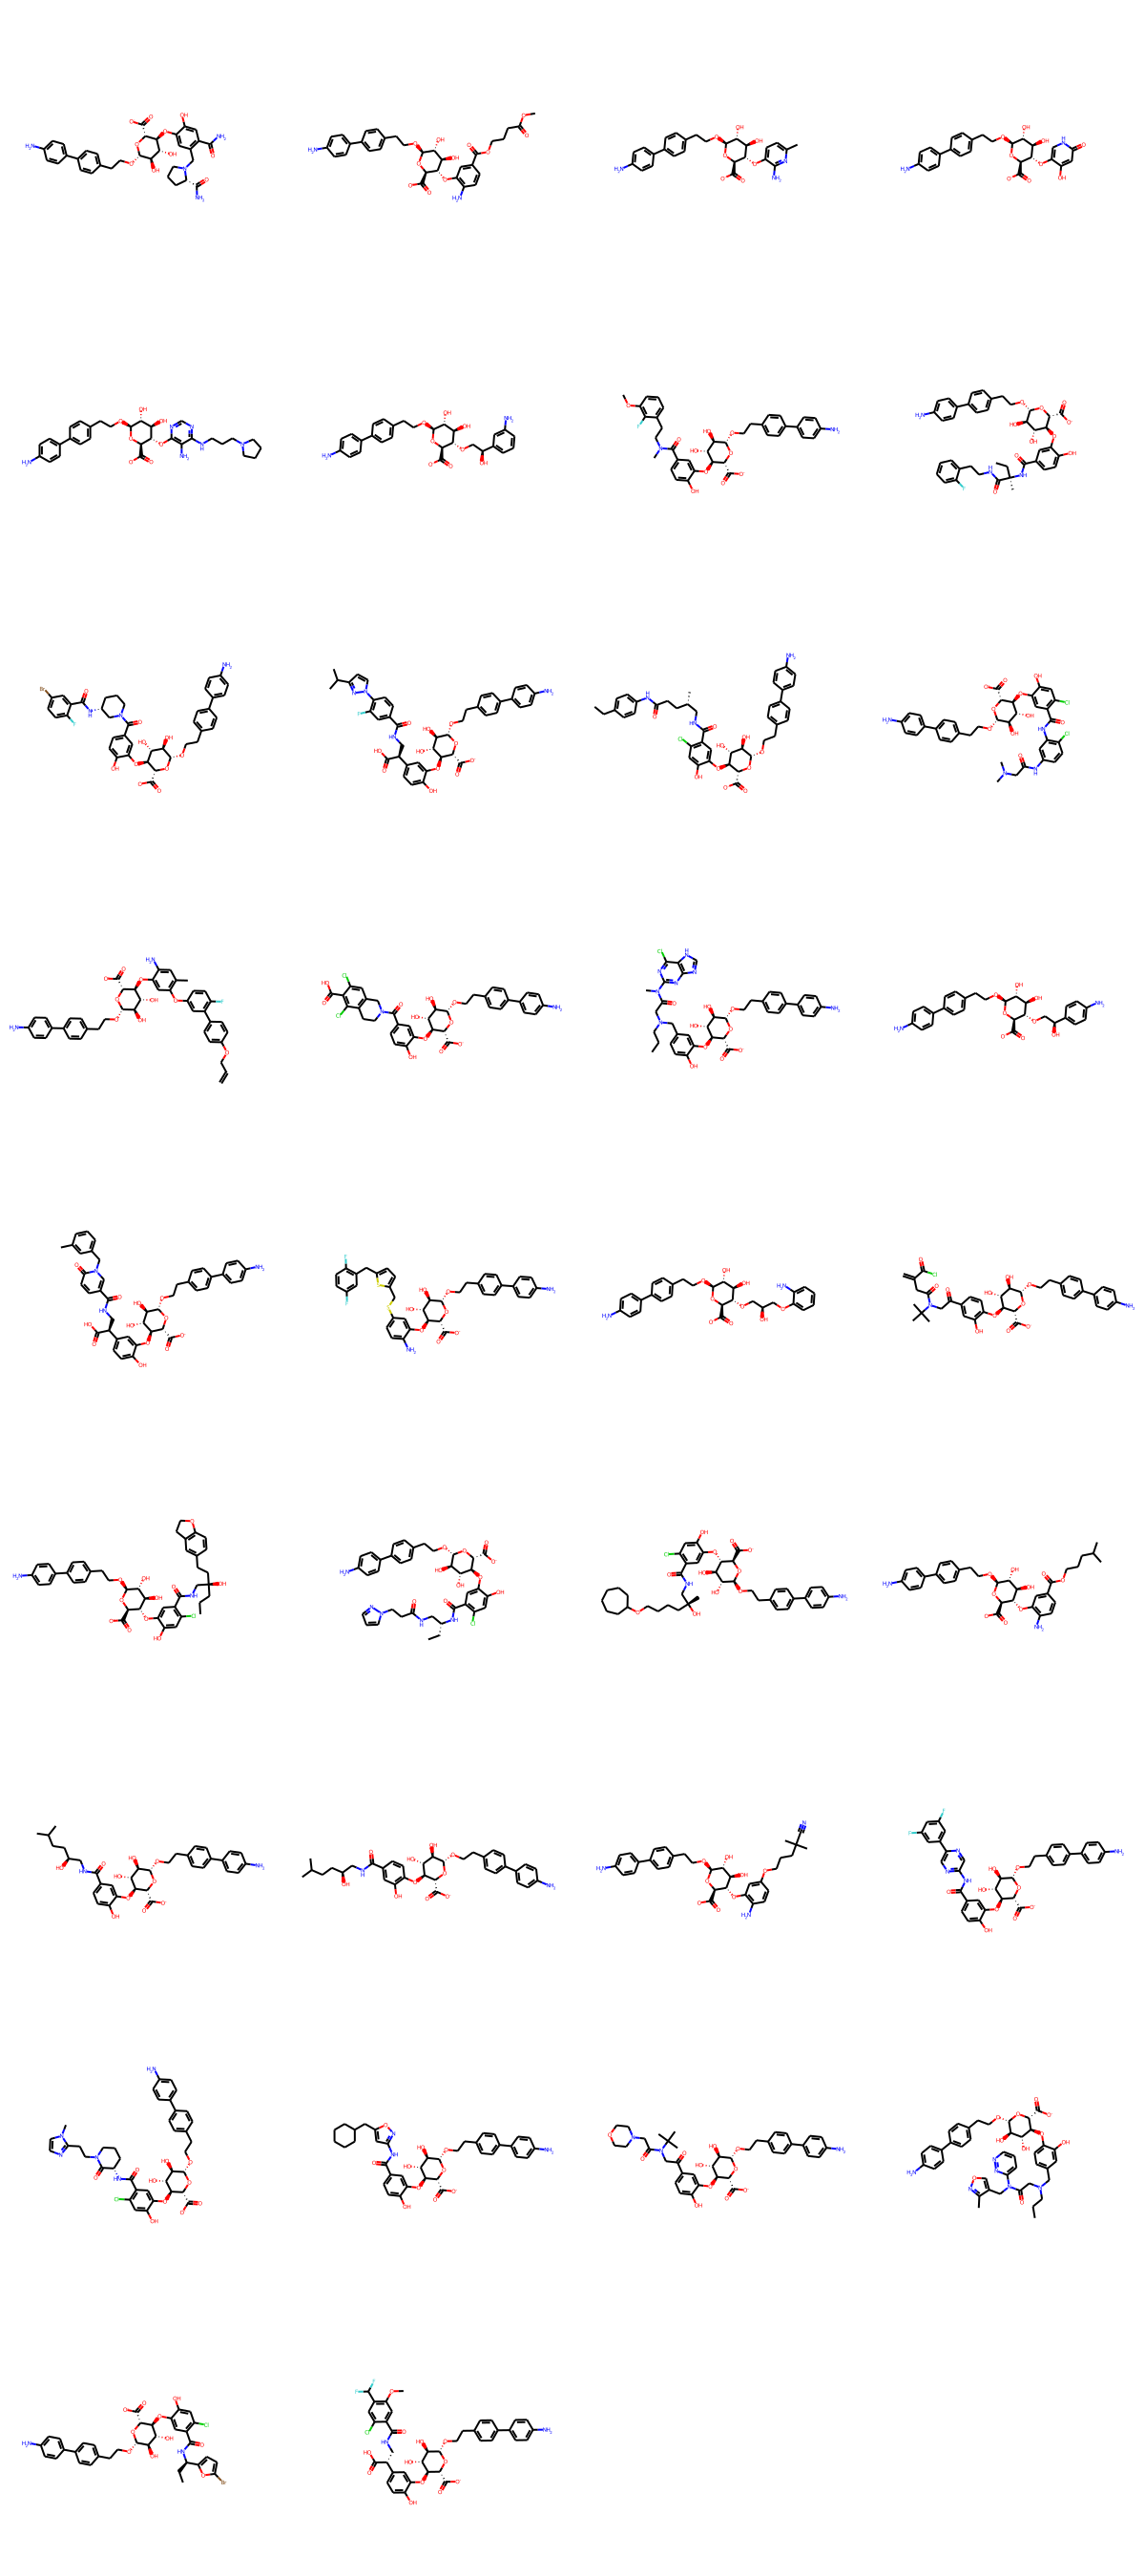

In [145]:
#Insert the same of the .smi file located in the root directory

RE7_enumerated = rdfiles.SmilesMolSupplier('Test_export.smi')

img_import = Draw.MolsToGridImage(RE7_enumerated, molsPerRow = 4, subImgSize = (300,300))
img_import

# Side-chain enumeration

In [158]:
IPythonConsole.drawOptions.addAtomIndices = True #writes all molecules with atom indecies
IPythonConsole.molSize = 300,300 #Picture size of individual molecules

In [235]:
glca = Chem.MolFromSmiles('O=C(O)[C@H]1O[C@H](O*)[C@H](O)[C@@H](O)[C@@H]1O') #Define substitution position

sidechain = ['OCC'] #Define side chain
# sidechain_2 = testlist

In [239]:
core = Chem.MolFromSmiles('O=C(O)[C@H]1O[C@H](O*)[C@H](O)[C@@H](O)[C@@H]1O') #Read core SMILES and define substitution position
chains = ['OCC','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),chainMol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
print(product_smi)


['CCOO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O', 'CCO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O', 'CCCO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O', 'CCCCO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O', 'CCCCCO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O', 'CCCCCCO[C@H]1O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]1O']


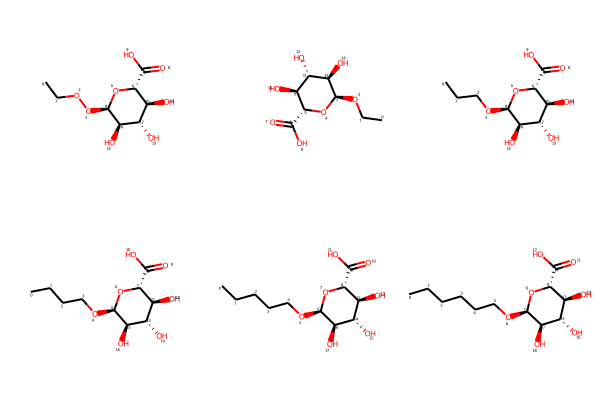

In [234]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])